In [1]:
url="https://raw.githubusercontent.com/darshML/ML-Projects/main/Datasets/diabetes.csv"

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
dia=pd.read_csv(url)

In [4]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Different Columns present in the Dataset:**

In [84]:
print("Different columns in Dataset:")
count=1
for i in dia.columns:
  print(f"{count}) {i}")
  count+=1


Different columns in Dataset:
1) Pregnancies
2) Glucose
3) BloodPressure
4) SkinThickness
5) Insulin
6) BMI
7) DiabetesPedigreeFunction
8) Age
9) Outcome


In [85]:
print("Number of rows present in the dataset are: ", dia.shape[0])

Number of rows present in the dataset are:  768


In [9]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
dia.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


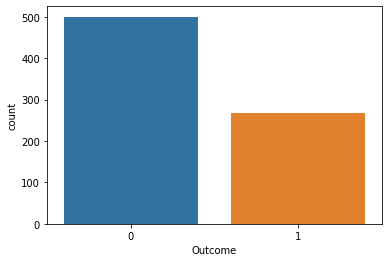

In [12]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(dia['Outcome'])
plt.show()

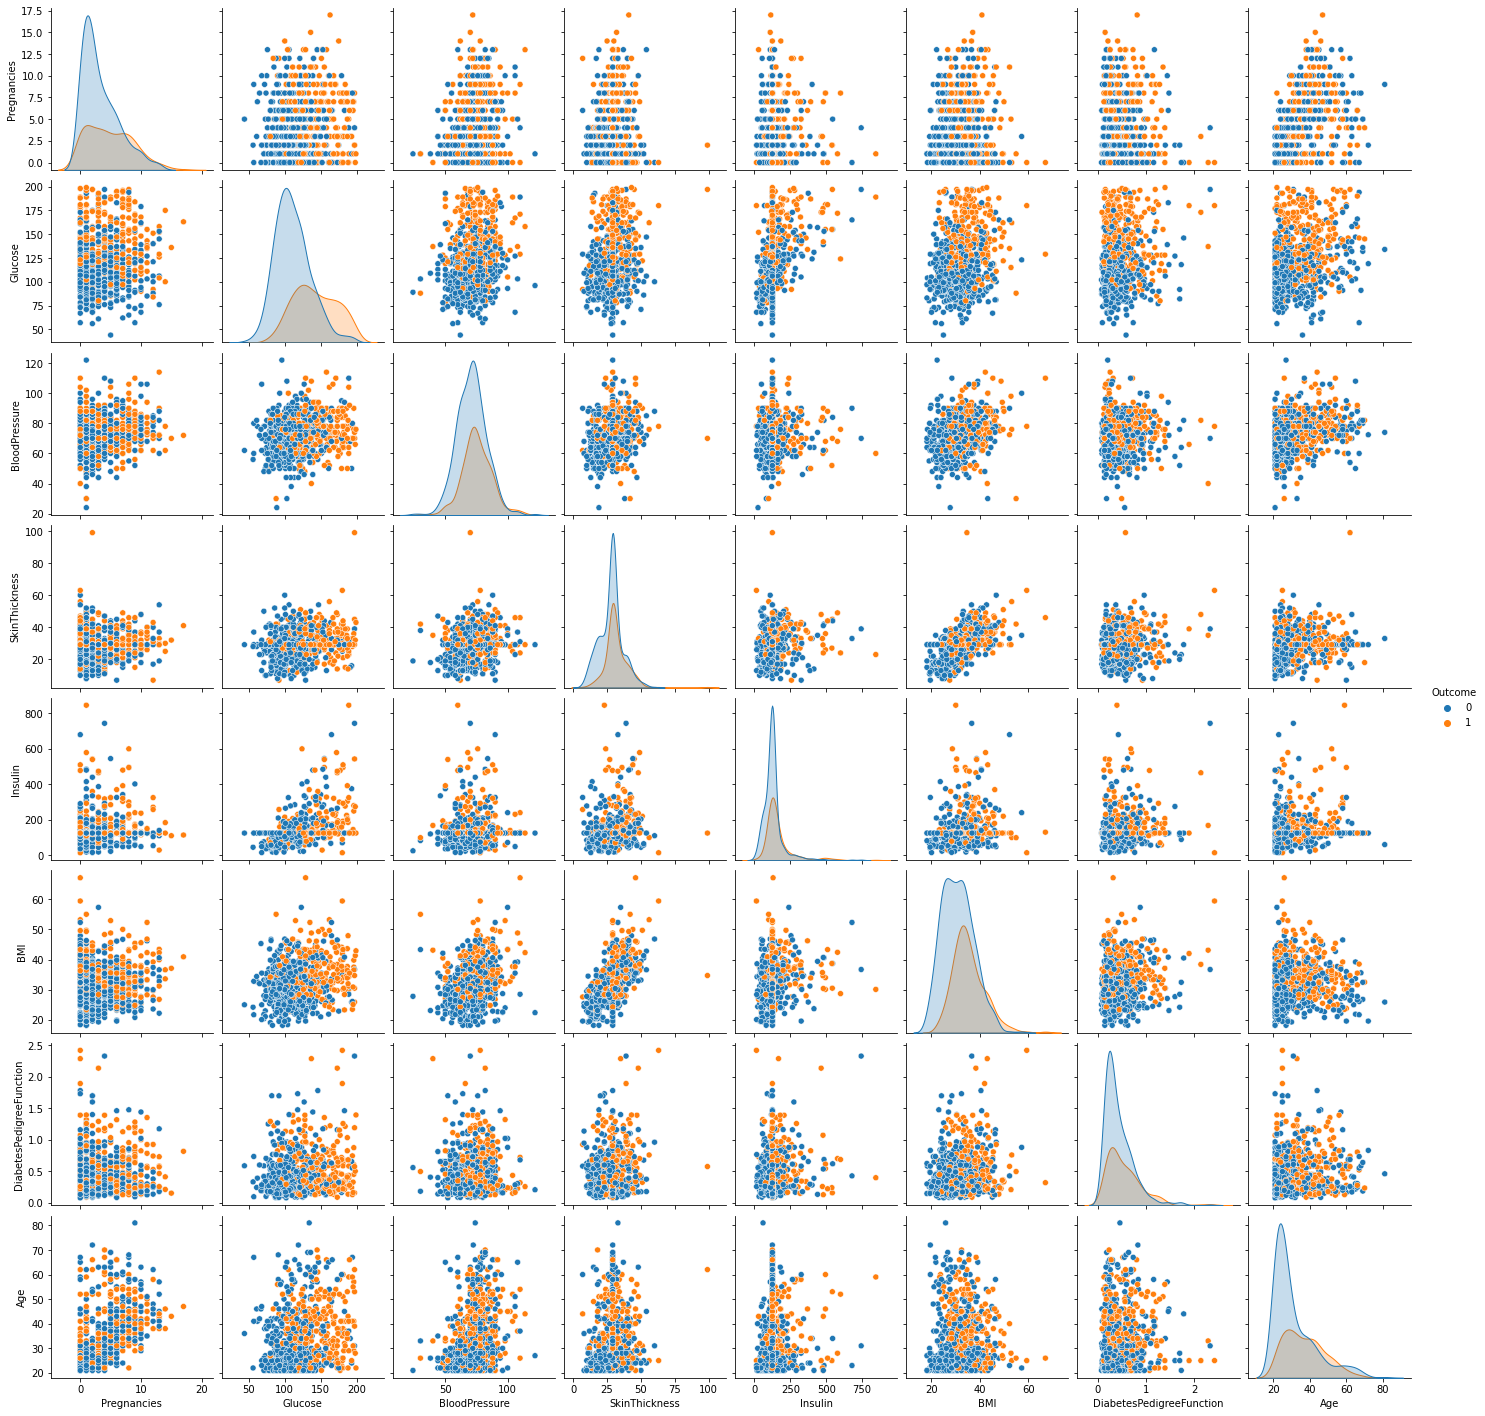

In [86]:
g = sns.pairplot(dia,hue="Outcome")

In [13]:
dia['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

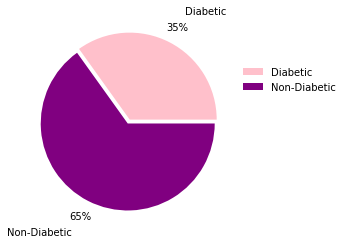

In [20]:
fig, ax = plt.subplots()
labels = ['Diabetic', 'Non-Diabetic']
percentages = [34.89, 65.10]
explode=(0.05,0)
color_s=('pink','purple')
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', shadow=False, startangle=0, pctdistance=1.2,labeldistance=1.4,colors=color_s)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [21]:
for col in dia.columns:
    print("The minimum value for the columns {} is {}".format(col, dia[col].min()))

The minimum value fore the columns Pregnancies is 0
The minimum value fore the columns Glucose is 0
The minimum value fore the columns BloodPressure is 0
The minimum value fore the columns SkinThickness is 0
The minimum value fore the columns Insulin is 0
The minimum value fore the columns BMI is 0.0
The minimum value fore the columns DiabetesPedigreeFunction is 0.078
The minimum value fore the columns Age is 21
The minimum value fore the columns Outcome is 0


***->only Pregnancie Column can take the values as zero***


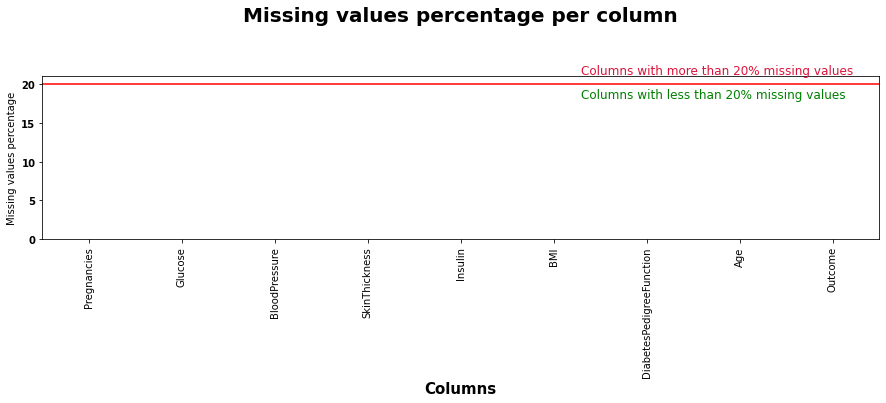

In [27]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' ,y=1.3)
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(dia, 20, color=sns.color_palette('Reds',15))



***->replacing the zeros present in the Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns with null.***

In [29]:
dia[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = dia[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

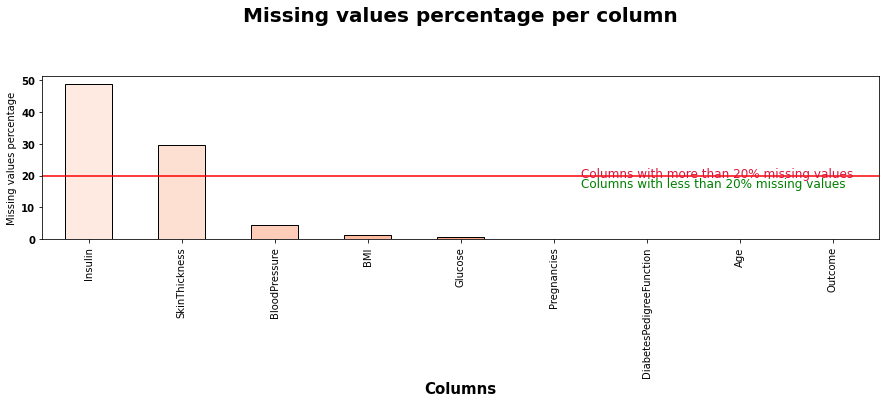

In [30]:
msv_1(dia, 20, color=sns.color_palette('Reds',15))

# **Exploratory Data Analysis**

*Insulin column has close to 50% zero or null values, followed by SkinThickness that has close to 30% missing values.*

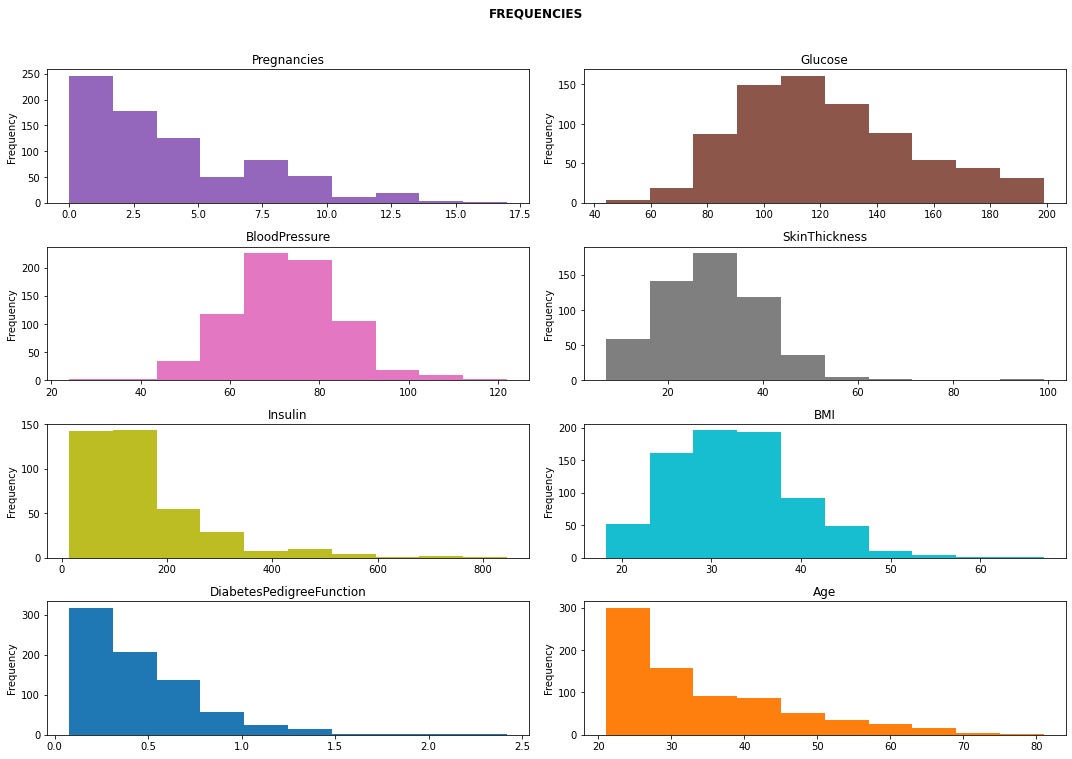

In [39]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = dia.drop('Outcome', axis = 1).columns
for col in columns:
    dia[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.suptitle('FREQUENCIES',y=1.05,weight='bold')
plt.tight_layout()
plt.show()


In [41]:
from scipy.stats import skew
for col in dia.drop('Outcome', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, dia[col].skew()))

Skewness for the column Pregnancies is 0.9016739791518588
Skewness for the column Glucose is 0.5309885349396285
Skewness for the column BloodPressure is 0.13415273171959252
Skewness for the column SkinThickness is 0.690619013984192
Skewness for the column Insulin is 2.166463843812443
Skewness for the column BMI is 0.5939697505712673
Skewness for the column DiabetesPedigreeFunction is 1.919911066307204
Skewness for the column Age is 1.1295967011444805


*Columns like Pregnancies, Glucose, BloodPressure, SkinThickness and BMI are not that much skewed. We can fill null values with the mean for these columns, but for columns like Insulin and DiabetesPedigreeFunction, we will have to replace them will median due to the effect of skewness.*

In [42]:
dia['Insulin'] = dia['Insulin'].fillna(dia['Insulin'].median()) # Filling null values with the median.
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    dia[col] = dia[col].fillna(dia[col].mean())

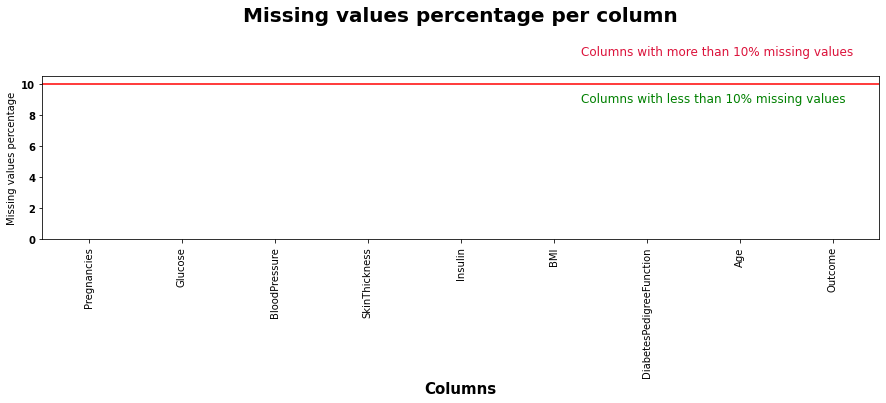

In [43]:
msv_1(dia, 10, color=sns.color_palette('Greens',15))

In [44]:
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
def mean_target(var):
    """
    A function that will return the mean values for 'var' column depending on whether the person
    is diabetic or not
    """
    return pd.DataFrame(dia.groupby('Outcome').mean()[var])

def distplot(col_name):
    """
    A function that will plot the distribution of column 'col_name' for diabetic and non-diabetic people separately
    """
    plt.figure(figsize=(9,8))
    ax = sns.distplot(dia[col_name][dia.Outcome == 1], color ="red", rug = True)
    sns.distplot(dia[col_name][dia.Outcome == 0], color ="lightblue",rug = True)
    plt.legend(['Diabetes', 'No Diabetes'])    

**PREGNANCIES**


*   Maximum people with diabetes lies in the range of 0-17.5
*   Mean = 4.865672

*The number of pregnancies is high for the diabetic people*



,Pregnancies
Outcome,
0,3.298000
1,4.865672


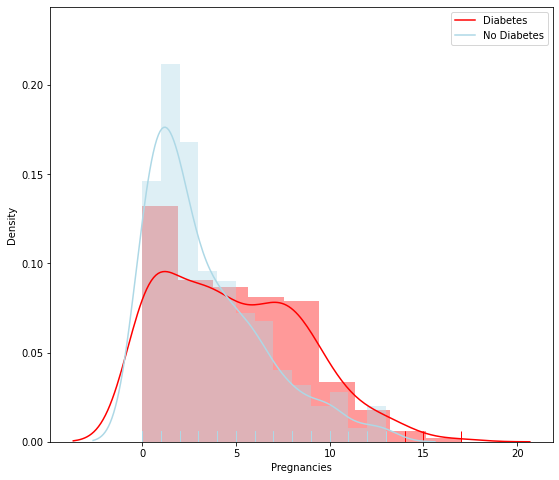

In [49]:
distplot('Pregnancies')
mean_target('Pregnancies')

**Insulin**


*   Maximum people with diabetes lies in the range of 100-210
*   Mean = 164.701493

*Diabetic People tend to have more Insulin level.*

,Insulin
Outcome,
0,127.792000
1,164.701493


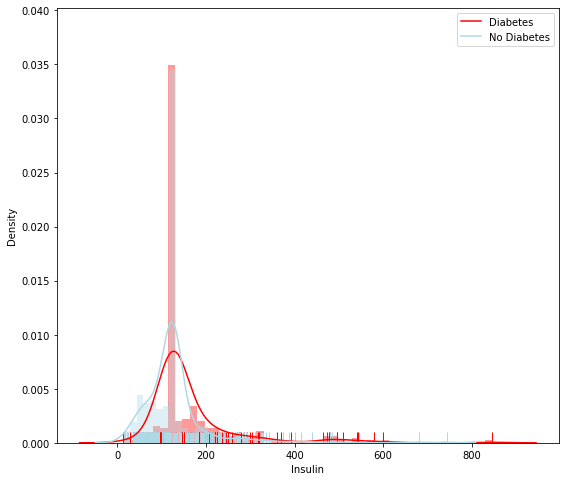

In [50]:
distplot('Insulin')
mean_target('Insulin')

**Blood Pressure**


*   Maximum people with diabetes lies in the range of 20-130
*   Mean = 75.147324

*The mean of the blood pressure is greater for diabetic people as compared to the non-diabetic people*

,BloodPressure
Outcome,
0,70.935397
1,75.147324


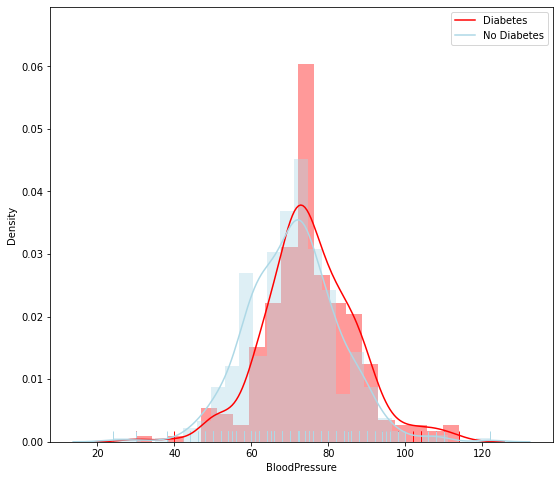

In [51]:
distplot('BloodPressure')
mean_target('BloodPressure')

**Glucose**


*   Maximum people with diabetes lies in the range of 75-200
*   Mean = 142.165573

*Diabetic People tend to have much higher Glucose level*

,Glucose
Outcome,
0,110.710121
1,142.165573


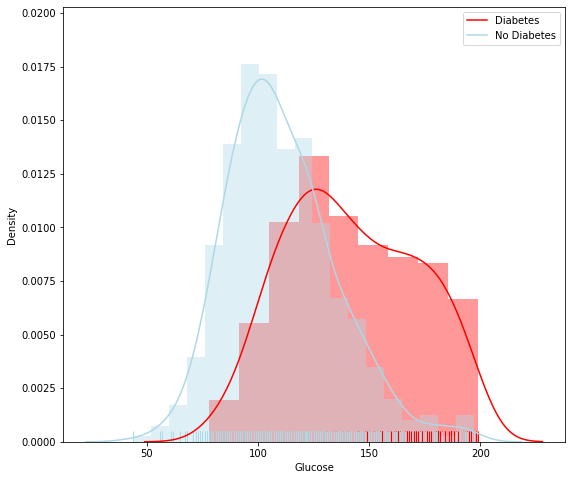

In [52]:
distplot('Glucose')
mean_target('Glucose')

# Common Man Analysis

**Age:**
*The median of the age of diabetic people is greater than that of non-diabetic people.*

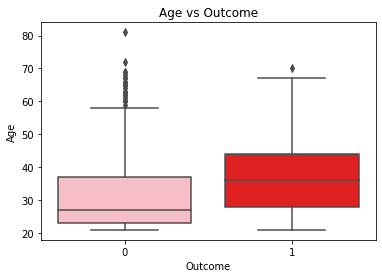

In [70]:
my_pal = {0: "lightpink", 1: "red"}
sns.boxplot(x = 'Outcome', y = 'Age', data = dia,palette=my_pal)
plt.title('Age vs Outcome')
plt.show()

**Blood Pressure:**
*The median of the BloodPressure of diabetic people lies close to the 75th Percentile of non-diabetic people.*

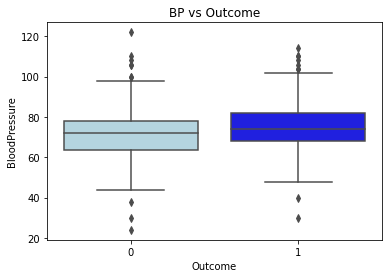

In [66]:
my_pal = {0: "lightblue", 1: "blue"}
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = dia, palette = my_pal)
plt.title('BP vs Outcome')
plt.show()


**Relationship between Age and BP**

*As the age increases, generally the Blood Pressure also increases*

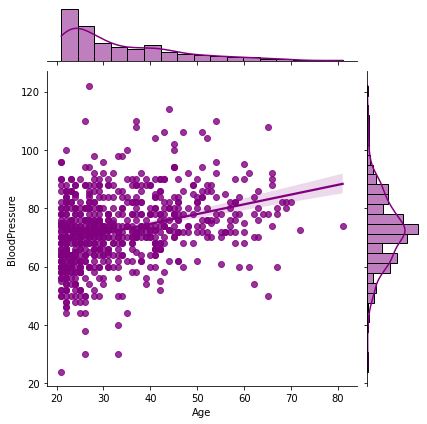

In [58]:
sns.jointplot(x='Age',y='BloodPressure', data=dia, kind = 'reg', color = 'purple')

**Diabetes Pedigree Function:**
*Quite a proportion of people having high DPF does not end up having Diabetes. But usually the diabetic people have DPF value close to 0.5 (50th Percentile)*

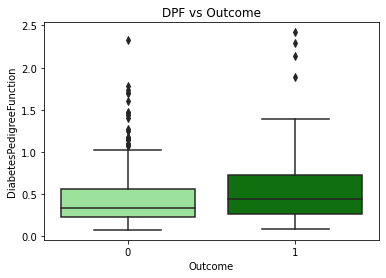

In [62]:
my_pal = {0: "lightgreen", 1: "green"}
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = dia, palette = my_pal)
plt.title('DPF vs Outcome')
plt.show()

**Glucose Level:**
*The median of the Glucose level of Diabetic People is greater than the 75th Percentile of the glucose level of non-diabetic people. Therefore having a high glucose level does increase the chances of having diabetes.*

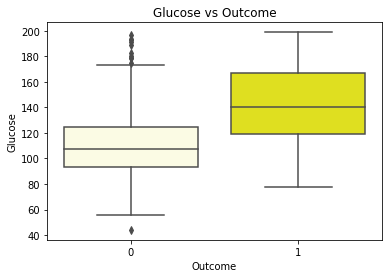

In [71]:
my_pal = {0: "lightyellow", 1: "yellow"}
sns.boxplot(x = 'Outcome', y = 'Glucose', data = dia, palette = my_pal)
plt.title('Glucose vs Outcome')
plt.show()

**Relationship Between Insulin and Glucose:**

*As the insulin level increases, the Glucose level also increases.*

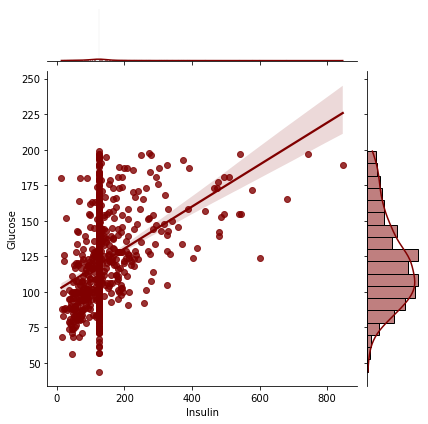

In [73]:
sns.jointplot(x='Insulin',y='Glucose', data=dia, kind = 'reg', color = 'maroon')
plt.show()

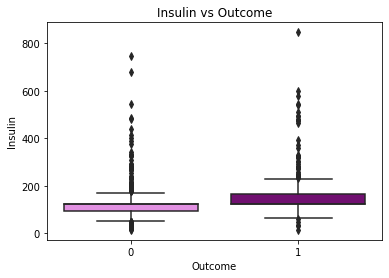

In [74]:
my_pal = {0: "violet", 1: "purple"}
sns.boxplot(x = 'Outcome', y = 'Insulin', data = dia,palette=my_pal)
plt.title('Insulin vs Outcome')
plt.show()

**Body Mass Index:**
*The Median BMI of the Diabetic People is greater than the Median BMI of the Non-Diabetic people.*

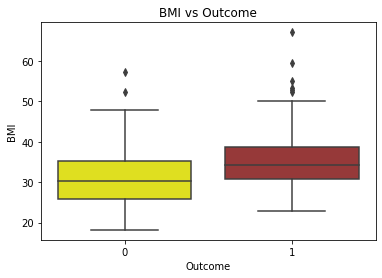

In [78]:
my_pal = {0: "yellow", 1: "brown"}
sns.boxplot(x = 'Outcome', y = 'BMI', data = dia, palette = my_pal)
plt.title('BMI vs Outcome')
plt.show()

# **Correlation Matrix**

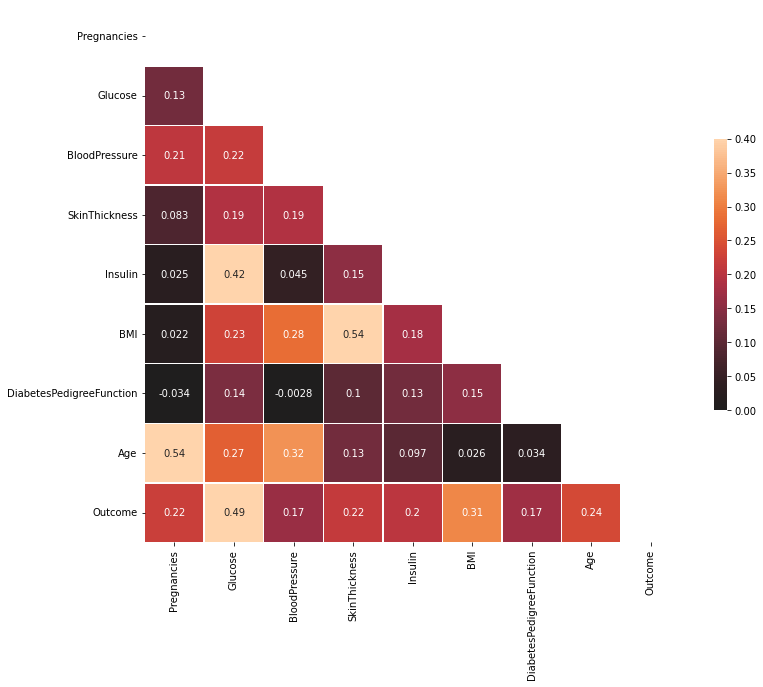

In [102]:
corr = dia.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, vmin=0, vmax=0.4, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

***From the above heatmap, we can observe that all the features are weakly correlated***